In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

from tensorflow.keras import models, layers, callbacks

In [169]:
# This is the california housing price dataset
housing=pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')

le = LabelEncoder()
housing["proximity_transformed"] = le.fit_transform(housing["ocean_proximity"])
housing.loc[housing.total_bedrooms.isna(), "total_bedrooms"] = housing.total_bedrooms.median()

# housing["rooms_per_household"] = housing.total_rooms / housing.households
# housing["population_per_household"] = housing.population / housing.households
# housing["berooms_per_room"] = housing.total_bedrooms / housing.total_rooms
# housing["longitude_sqrd"] = housing.longitude * housing.longitude
# housing["latitude_sqrd"] = housing.latitude * housing.latitude
# housing["income_sqrd"] = housing.median_income * housing.median_income

X = housing.drop(["median_house_value", "ocean_proximity"], axis = "columns")
y = housing.median_house_value

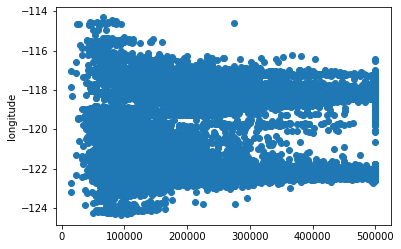

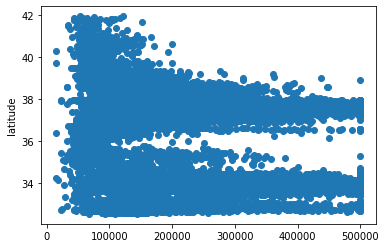

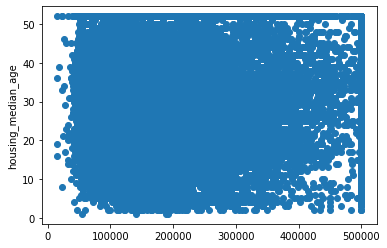

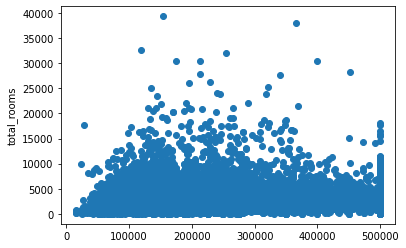

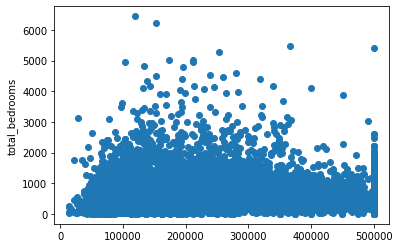

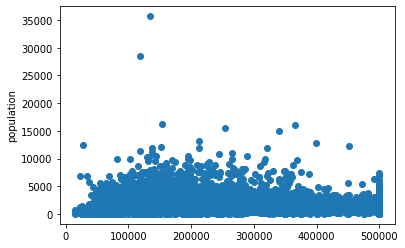

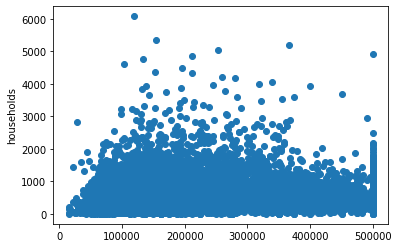

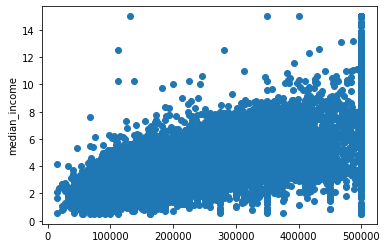

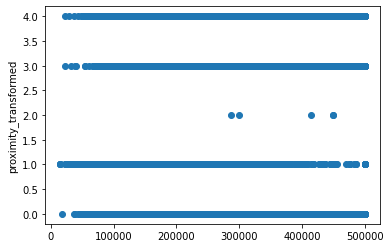

In [170]:
for i in X:
  plt.scatter(y, X[i])
  plt.ylabel(i)
  plt.show()

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 33, shuffle = True)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [172]:
X_train[0:5]

array([[ 0.51733492, -0.64983469, -0.37342281,  0.03526317,  0.4241515 ,
         1.41251455,  0.37133525, -0.50716433, -0.81753418],
       [ 0.81770726, -0.8329497 , -0.29418414, -0.72840039, -0.58995237,
         0.19270274, -0.56443888,  0.18343798, -0.81753418],
       [ 1.23822855, -1.39638052, -0.29418414,  0.39227137,  1.05002535,
         0.82661369,  1.03233913, -0.65549737,  2.00684585],
       [ 0.66251488, -0.76721611,  0.97363466, -0.5483166 , -0.392308  ,
         0.33228762, -0.38298683, -1.16585904, -0.81753418],
       [ 0.73760797, -0.81416867,  1.05287334, -0.6724345 , -0.76171474,
        -0.64125024, -0.76922048, -0.09103149, -0.81753418]])

In [190]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [191]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

69991.01218695605

In [175]:
svr = SVR()
svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [176]:
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

119607.04574630958

In [182]:
model_1 = models.Sequential([
    # layers.InputLayer(input_shape=X_train.shape[1:]),
    # layers.BatchNormalization(),
    # layers.Dense(500, activation="relu", kernel_initializer="he_normal"),
    # layers.Dense(400, activation="relu", kernel_initializer="he_normal"),
    layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    # layers.BatchNormalization(),
    # layers.Dense(300, activation="relu", kernel_initializer="he_normal"),
    # layers.BatchNormalization(),
    layers.Dense(200, activation="relu", kernel_initializer="he_normal"),
    # layers.BatchNormalization(),
    layers.Dense(100, activation="relu", kernel_initializer="he_normal"),
    layers.Dense(1)
])

model_1.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])
ES = callbacks.EarlyStopping(patience=7, restore_best_weights=True)
reduce_lr = callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3)
model_1.fit(X_train, y_train, epochs=200, validation_split=0.15, callbacks=[ES, reduce_lr])

Epoch 1/200
439/439 [==============================] - 2s 3ms/step - loss: 27649540096.0000 - mean_squared_error: 27649540096.0000 - val_loss: 8309739008.0000 - val_mean_squared_error: 8309739008.0000
Epoch 2/200
439/439 [==============================] - 1s 3ms/step - loss: 7279030272.0000 - mean_squared_error: 7279030272.0000 - val_loss: 5940043264.0000 - val_mean_squared_error: 5940043264.0000
Epoch 3/200
439/439 [==============================] - 1s 3ms/step - loss: 5803416576.0000 - mean_squared_error: 5803416576.0000 - val_loss: 5137812480.0000 - val_mean_squared_error: 5137812480.0000
Epoch 4/200
439/439 [==============================] - 1s 3ms/step - loss: 5157882880.0000 - mean_squared_error: 5157882880.0000 - val_loss: 4749954560.0000 - val_mean_squared_error: 4749954560.0000
Epoch 5/200
439/439 [==============================] - 1s 3ms/step - loss: 4810971648.0000 - mean_squared_error: 4810971648.0000 - val_loss: 4494434304.0000 - val_mean_squared_error: 4494434304.0000
Epo

In [184]:
y_pred = model_1.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

55626.475012239775

In [179]:
print(y_pred[:10])
print(y_test[:10])

[[372905.56]
 [ 76616.93]
 [281597.4 ]
 [ 76128.31]
 [344476.4 ]
 [274245.34]
 [141758.86]
 [140519.97]
 [288057.06]
 [279109.72]]
10773    441100.0
2552      81300.0
1731     110000.0
6342     105800.0
8912     366700.0
10479    332000.0
9451     164600.0
19060    254700.0
1547     266000.0
8944     461100.0
Name: median_house_value, dtype: float64


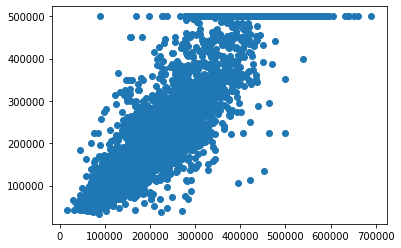

In [180]:
plt.scatter(y_pred, y_test)